# Predicció del preu d'un smartphone
<img src="https://www.danza.es/multimedia/biografias/toni-mira/fotografia_mini" width="124">
<img src="https://www.uab.cat/ca/bioquimica/img/imatge-grup-recerca/img_barnadas.jpg" width="124">
<img src="https://media.licdn.com/dms/image/C4D03AQEhvo9I49TcIw/profile-displayphoto-shrink_200_200/0/1516273408037?e=2147483647&v=beta&t=Gt5DQskgOdcVvVswAI4olZv4fjhuMx6igOL0Lck8tx8" width="150">
<img src="https://fad.cat/editor/wp-content/uploads/2020/09/Ignasi-Bonet-2019-1024x1024.jpg" width="150">
<img src = "https://media.licdn.com/dms/image/C5603AQEf4IaqIC9TJQ/profile-displayphoto-shrink_200_200/0/1517268969147?e=2147483647&v=beta&t=6xT7f4ajDQ1Af8ZzDIOh5Yidl0bd-Cm7vFCLaO17hms" width ="150"> 
<img src = "https://media.licdn.com/dms/image/C4D03AQGwIEMiD2pifQ/profile-displayphoto-shrink_200_200/0/1605860256354?e=2147483647&v=beta&t=HFH9emP2gpIyEAncmUI7ItYCctUKWwA9qzkNjwz3l_k" width ="150">
<img src = "https://pbs.twimg.com/profile_images/990569948438245376/6eV8oIww_400x400.jpg" width ="150">
<img src = "https://media.licdn.com/dms/image/C5603AQGAzhZMkjY0uQ/profile-displayphoto-shrink_800_800/0/1517590049294?e=2147483647&v=beta&t=OiR5bub-XQmtg271GODafLkX38WbMfC6PYChbITqYQU" width ="150">
<img src = "https://unio.coop/wp-content/uploads/2023/04/francesc-baiges.jpg" width ="150">
<img src = "https://i1.rgstatic.net/ii/profile.image/380426016313345-1467712038241_Q512/Pere-Hidalgo-Santos.jpg" 
width ="150">
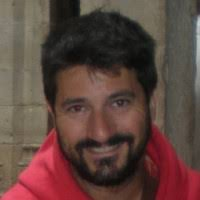
<img src = "https://media.licdn.com/dms/image/D4D03AQHXmTAEif_r2Q/profile-displayphoto-shrink_200_200/0/1701179911002?e=2147483647&v=beta&t=CExzWn2gGNHh-je6Gm0qhiqLofBnwjmVJniQhOXXb6A"
width ="150">

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
path_file = os.getcwd() + "/smartphone_data.csv"
data = pd.read_csv(path_file)
data.head(5)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [17]:
data.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

# Preprocessament
Fem `drop` de fast charging i de model ja que fast charging no aporta informació extra respecte a fast_charging_available i model té un nom únic per a cada mòbil.

In [19]:
data.drop(columns = ["fast_charging"], inplace = True)
data.drop(columns = ["model"], inplace = True)

## Matriu de correlació de les nostres variables numèriques sense preprocessar

<Axes: >

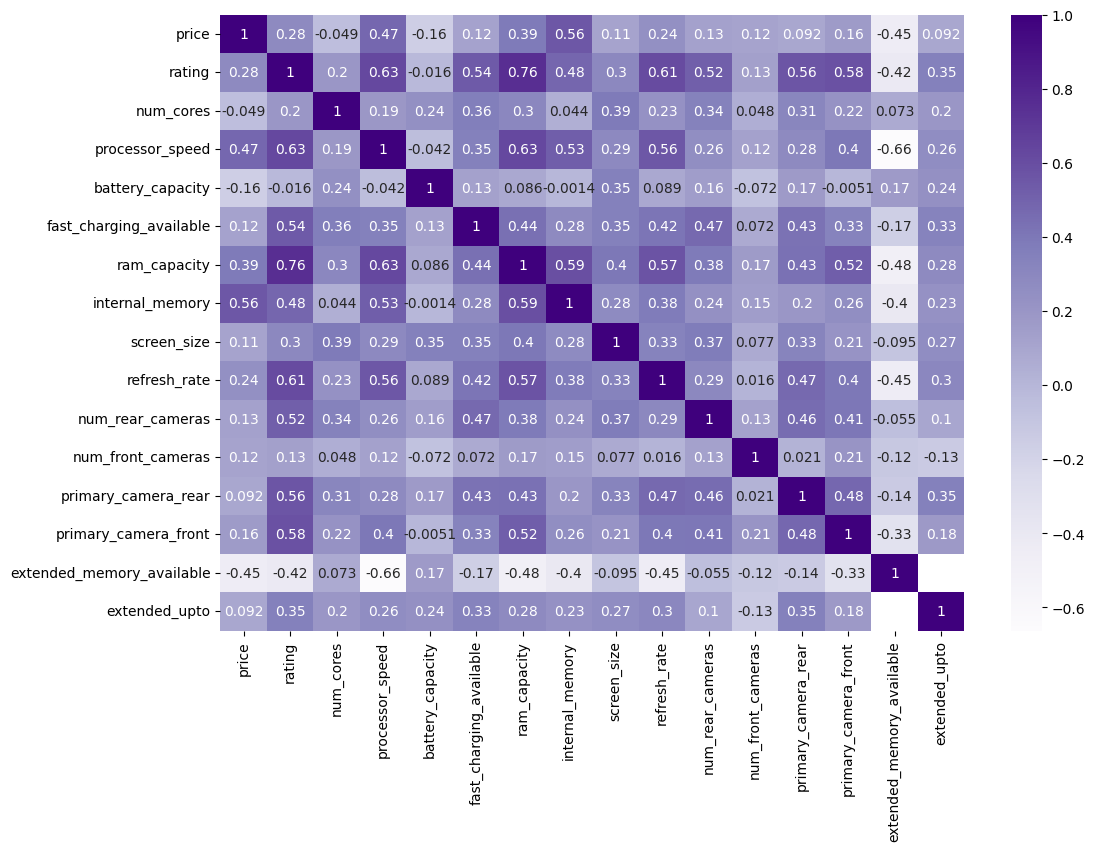

In [20]:
data_num = data.select_dtypes(include = [np.number])
# correlation matrix
cor = data_num.corr()
# plot it
plt.figure(figsize = (12, 8))
sns.heatmap(cor, annot = True, cmap = plt.cm.Purples)


## Visualitzem les distribucions de les nostres variables numèriques

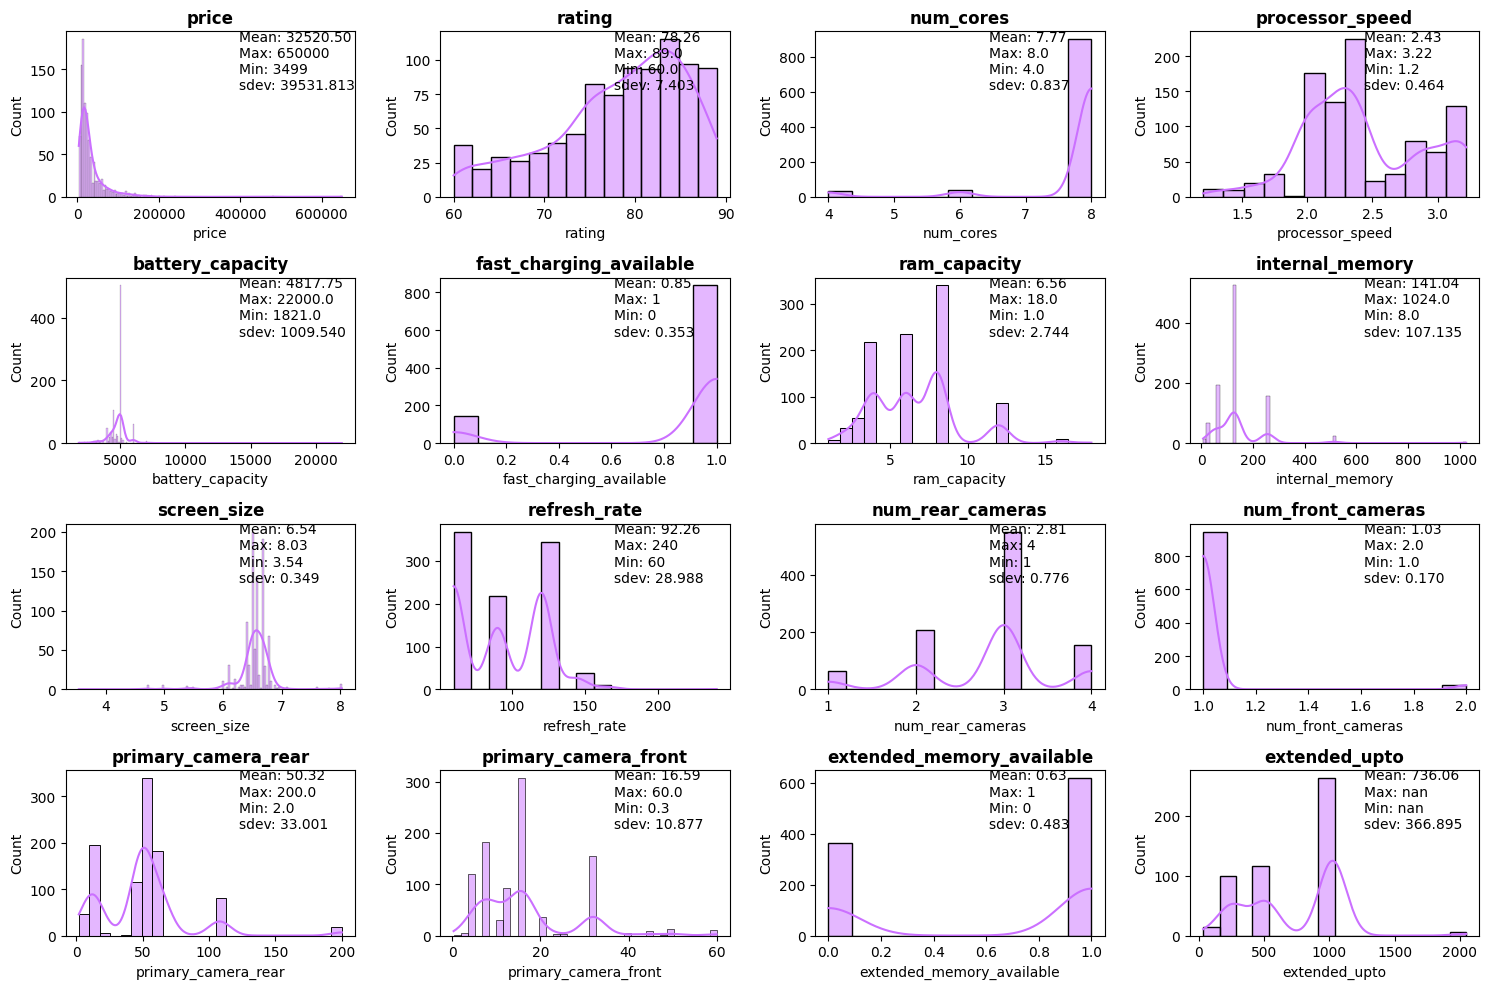

In [21]:
numericals = data_num.columns

fig, axs = plt.subplots(4, 4, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes

for i, column in enumerate(numericals):
    column_treated = pd.to_numeric(data[column], errors='coerce')
    mitjana = column_treated.mean()
    sns.histplot(data_num[column], kde=True, ax=axs[i], color="#cb70ff")
    axs[i].set_title(column, fontweight="bold")
    axs[i].text(0.6, 0.65, f"Mean: {mitjana:.2f}\nMax: {max(data[column])} \nMin: {min(data[column])} \nsdev: {column_treated.std():.3f}", transform=axs[i].transAxes)  # Use transAxes to position text

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

## Fem els barplots de les nostres variables categòriques

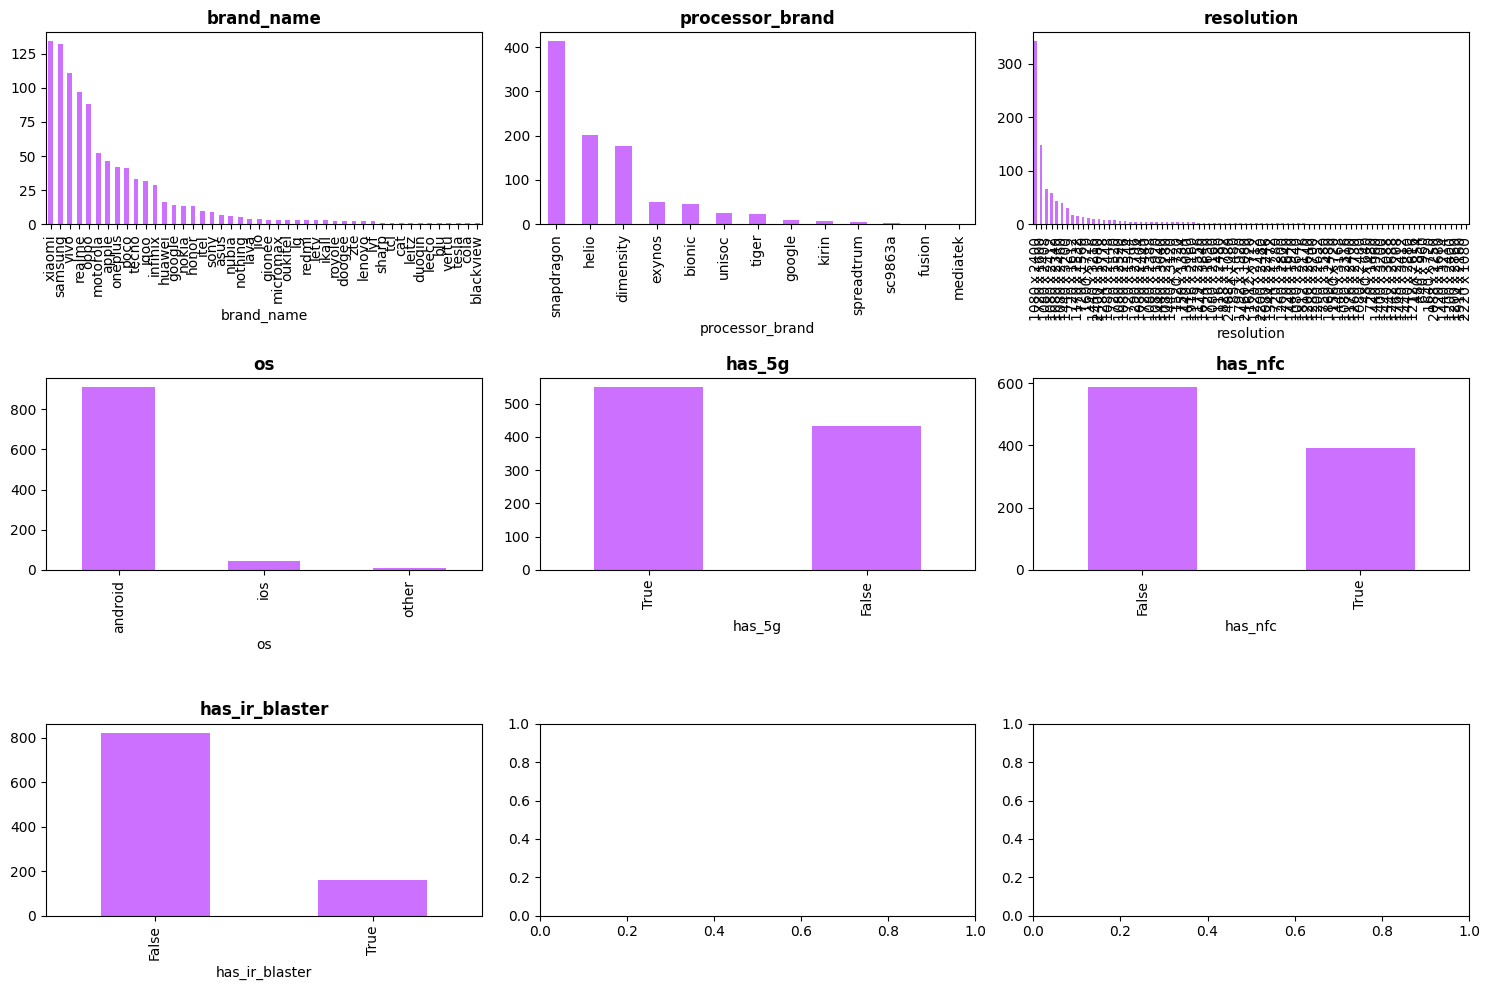

In [22]:
categoricals = data.select_dtypes(include=[object]).columns 
categoricals = pd.Index(categoricals)
categoricals = categoricals.append(pd.Index(["has_5g","has_nfc","has_ir_blaster"]))

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes

for i, column in enumerate(categoricals):
    data[column].value_counts().plot(kind='bar', ax=axs[i], color = "#cb70ff")
    axs[i].set_title(column, fontweight="bold")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

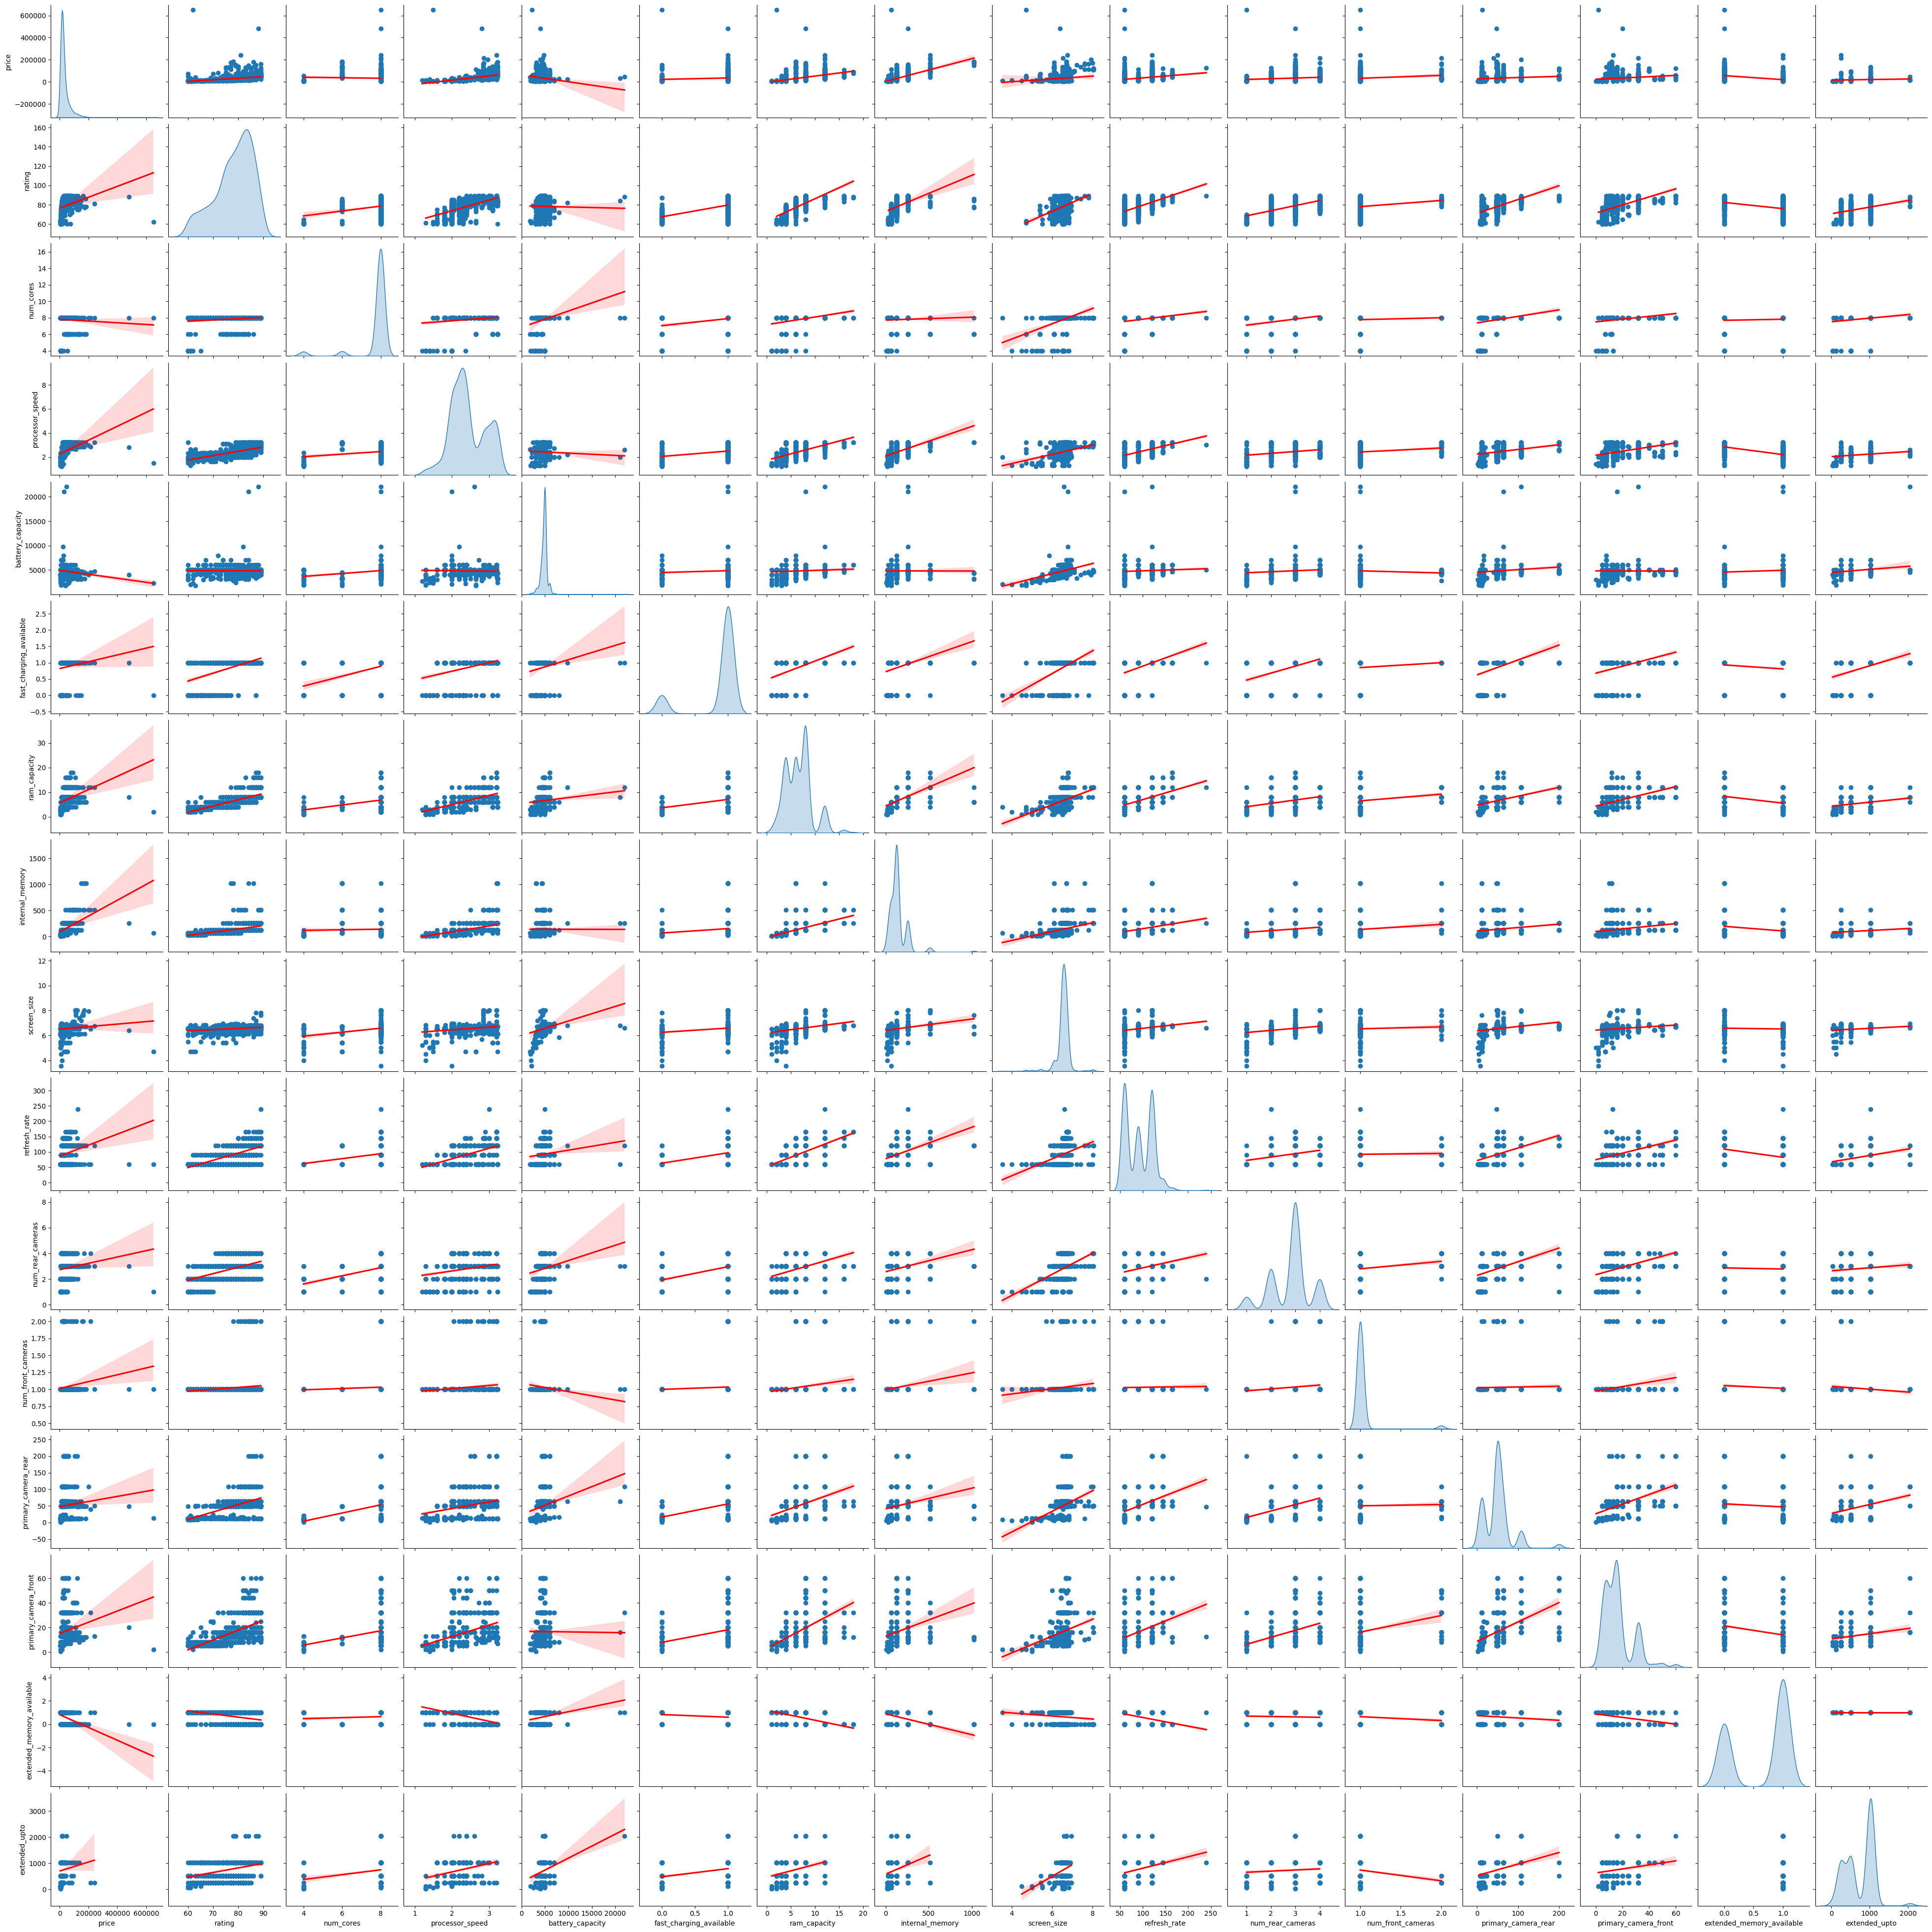

In [23]:
sns.pairplot(data[numericals], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 1}})

## Tractem les variables que puguin presentar problemes

### Tractament de la variable "processor_brand"

In [25]:
data2 = data.copy()

count = data2['processor_brand'].value_counts()
mask = data2['processor_brand'].isin(count[count < 60].index)
data2.loc[mask, 'processor_brand'] = 'others'

In [26]:
print(data2['processor_brand'].value_counts())

processor_brand
snapdragon    413
helio         201
dimensity     177
others        169
Name: count, dtype: int64


### Tractament de la variable "resolution"

In [27]:
def calculate_pixels(resolution):
    width, height = resolution.split('x')
    return int(width) * int(height)

data2['resolution'] = data2['resolution'].apply(calculate_pixels)
data2['resolution'] = pd.to_numeric(data2['resolution'])
data2 = data2.rename(columns={'resolution': 'number_pixels'})

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   price                      980 non-null    int64  
 2   rating                     879 non-null    float64
 3   has_5g                     980 non-null    bool   
 4   has_nfc                    980 non-null    bool   
 5   has_ir_blaster             980 non-null    bool   
 6   processor_brand            960 non-null    object 
 7   num_cores                  974 non-null    float64
 8   processor_speed            938 non-null    float64
 9   battery_capacity           969 non-null    float64
 10  fast_charging_available    980 non-null    int64  
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  screen_size                980 non-null    float64

### Tractament de la variable "brand_name"

In [28]:
print(data2['brand_name'].value_counts())

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64


In [30]:
count = data2['brand_name'].value_counts()
mask = data2['brand_name'].isin(count[count < 40].index)
data2.loc[mask, 'brand_name'] = 'others'
print(data2['brand_name'].value_counts())

brand_name
others      237
xiaomi      134
samsung     132
vivo        111
realme       97
oppo         88
motorola     52
apple        46
oneplus      42
poco         41
Name: count, dtype: int64


### Convertim a categoriques les següents variables
"""refresh_rate,num_rear_cameras, num_front_cameras (bin),extended_memory_available,fast_charging_available (bin), num_cores"""


In [31]:
to_categorical = ["refresh_rate", "num_rear_cameras","num_front_cameras","extended_memory_available","fast_charging_available","num_cores"]
for col in to_categorical:
    data2[col] = data2[col].astype('category')
data2.head(10)


,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,screen_size,refresh_rate,number_pixels,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,...,6.70,120,4631040,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,...,6.59,120,2604960,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,16499,75.0,True,False,False,others,8.0,2.40,5000.0,...,6.60,90,2600640,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,...,6.55,120,2592000,3,1.0,android,50.0,16.0,1,1024.0
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,...,6.70,120,2604960,3,1.0,android,108.0,16.0,0,NaN
5,samsung,16999,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,...,6.60,120,2600640,3,1.0,android,50.0,8.0,1,1024.0
6,apple,65999,81.0,True,True,False,others,6.0,3.22,3279.0,...,6.10,60,2962440,2,1.0,ios,12.0,12.0,0,NaN
7,xiaomi,29999,86.0,True,False,True,dimensity,8.0,2.60,4980.0,...,6.67,120,2592000,3,1.0,android,200.0,16.0,0,NaN
8,others,26749,85.0,True,True,False,snapdragon,8.0,2.50,4500.0,...,6.55,120,2592000,2,1.0,android,50.0,16.0,0,NaN
9,oneplus,28999,84.0,True,True,False,dimensity,8.0,3.00,4500.0,...,6.43,90,2592000,3,1.0,android,50.0,32.0,0,NaN


## Tractament dels outliers

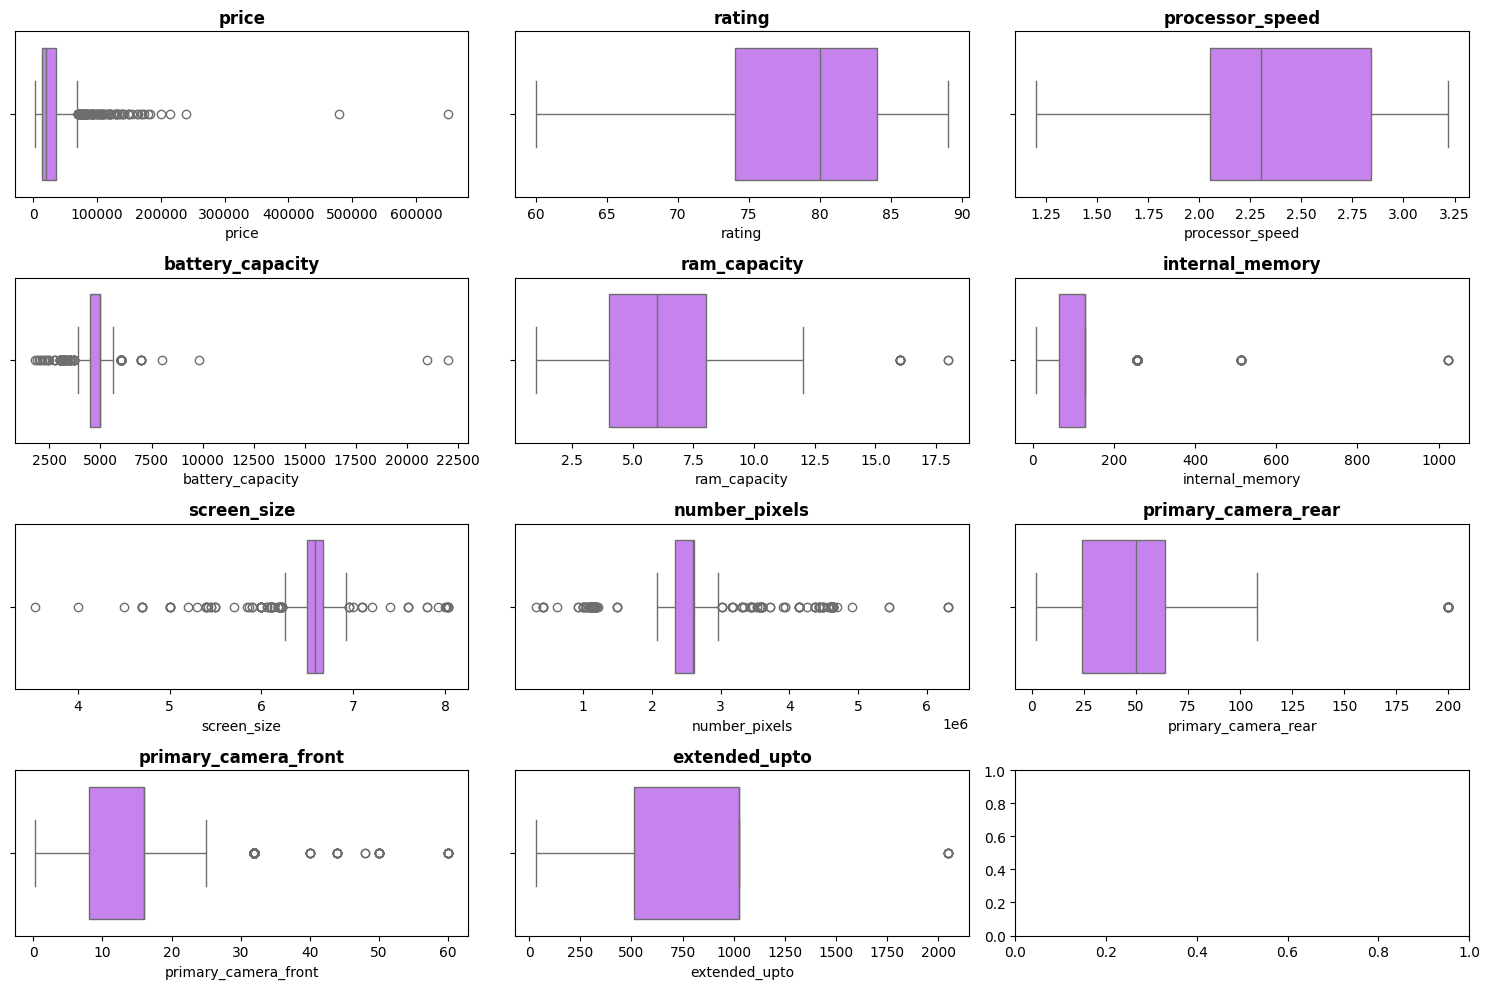

In [32]:
fig, axs = plt.subplots(4, 3, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes
numericals = data2.select_dtypes(include=[np.number]).columns
for i, column in enumerate(numericals):
    column_treated = pd.to_numeric(data2[column], errors='coerce').dropna()
    sns.boxplot(x=column_treated, ax=axs[i], color = "#cb70ff")
    axs[i].set_title(column, fontweight="bold")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

### Observem aquelles variables que presenten els outliers més extrems

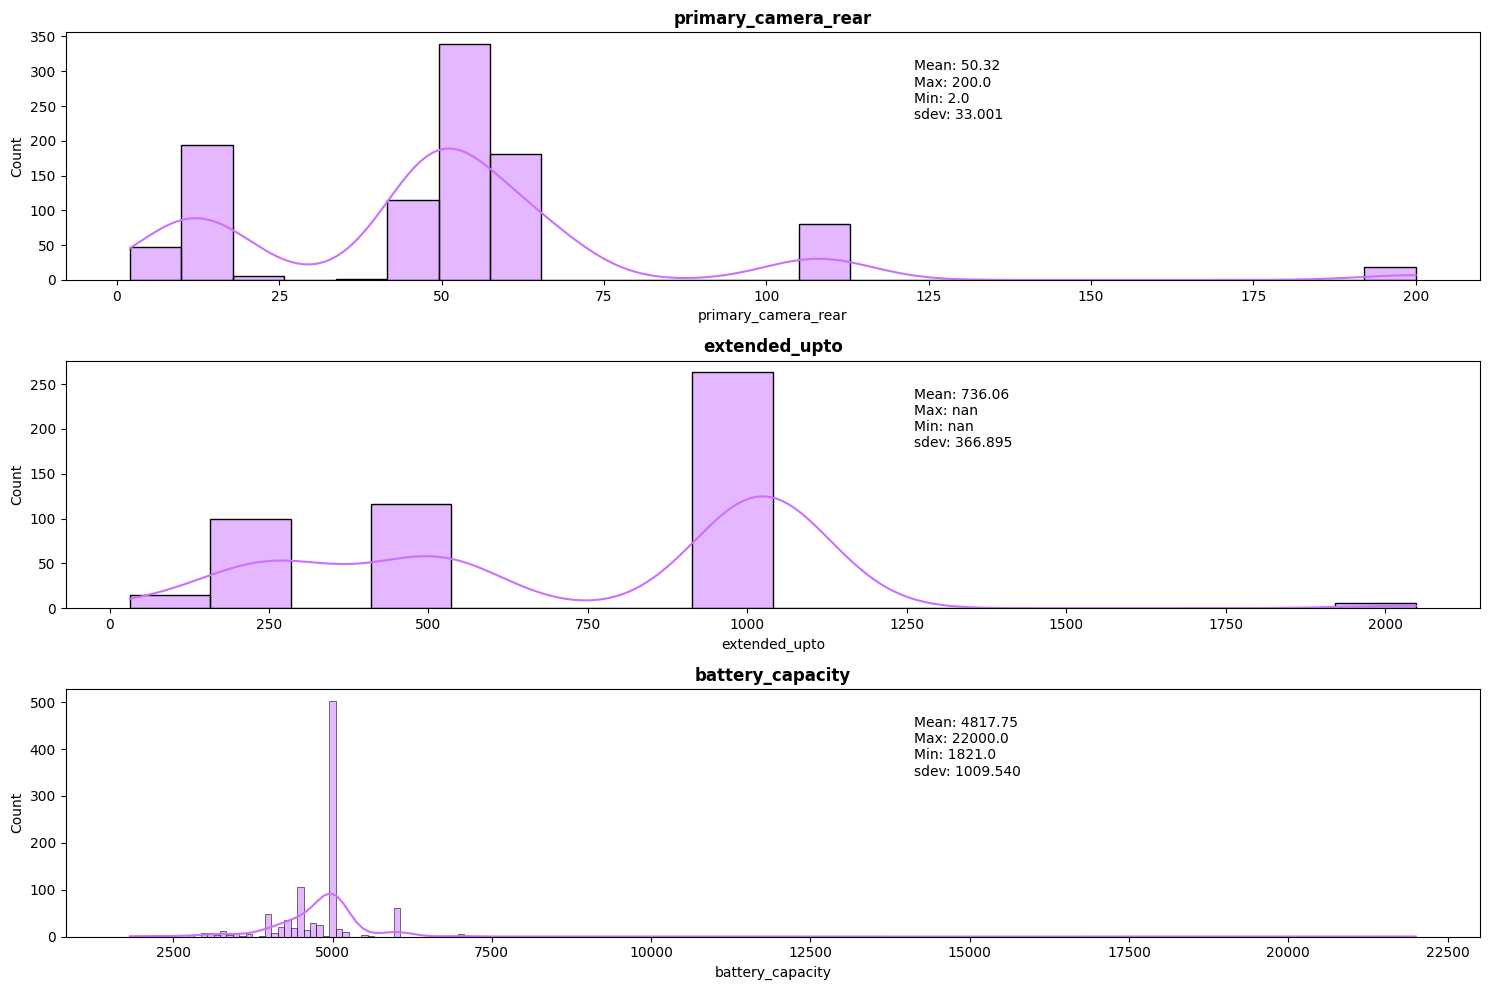

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes
selected = ["primary_camera_rear","extended_upto","battery_capacity"]
for i, column in enumerate(selected):
    column_treated = pd.to_numeric(data2[column], errors='coerce')
    mitjana = column_treated.mean()
    sns.histplot(data_num[column], kde=True, ax=axs[i], color="#cb70ff")
    axs[i].set_title(column, fontweight="bold")
    axs[i].text(0.6, 0.65, f"Mean: {mitjana:.2f}\nMax: {max(data2[column])} \nMin: {min(data2[column])} \nsdev: {column_treated.std():.3f}", transform=axs[i].transAxes)  # Use transAxes to position text

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

### PCA de les nostres dades per trobar outliers

(452, 3)
(980, 22)
(980, 22)


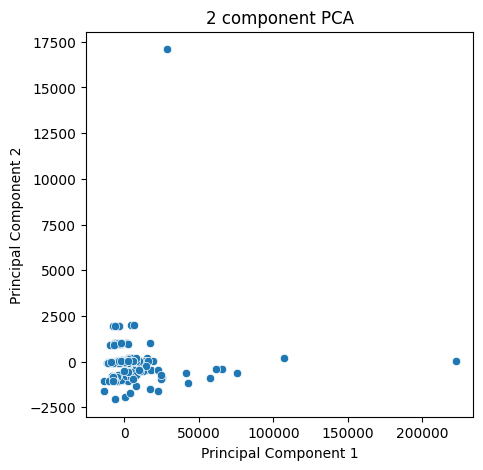

In [45]:
pca = PCA(n_components=2)
pca.fit(data_num.dropna())
data_pca = pca.transform(data_num.dropna())
data_pca = pd.DataFrame(data_pca, columns=['pca1', 'pca2'])

clf = IsolationForest(random_state=0,contamination=0.05)
clf.fit(data_pca)
outliers = clf.predict(data_pca)
data_pca['outliers'] = outliers

print(data_pca.shape)
print(data2.shape)
# Get the indices of the outliers
outlier_indices = data_pca[data_pca['outliers'] == -1].index

# Drop the 
print(data2.shape)

# plot the data
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pca1', y='pca2', data=data_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
# plot the outliers
outliers = data_pca[data_pca['outliers'] == -1]
plt.scatter(outliers['pca1'], outliers['pca2'], color='red', label='outliers')
# print the number of outliers
print(f'Number of outliers: {len(outliers)}')
plt.legend()
plt.show()


### Eliminem les files considerades outliers

In [ ]:
data2 = data2.drop(outlier_indices)


## Estudi dels missing values

<Axes: >

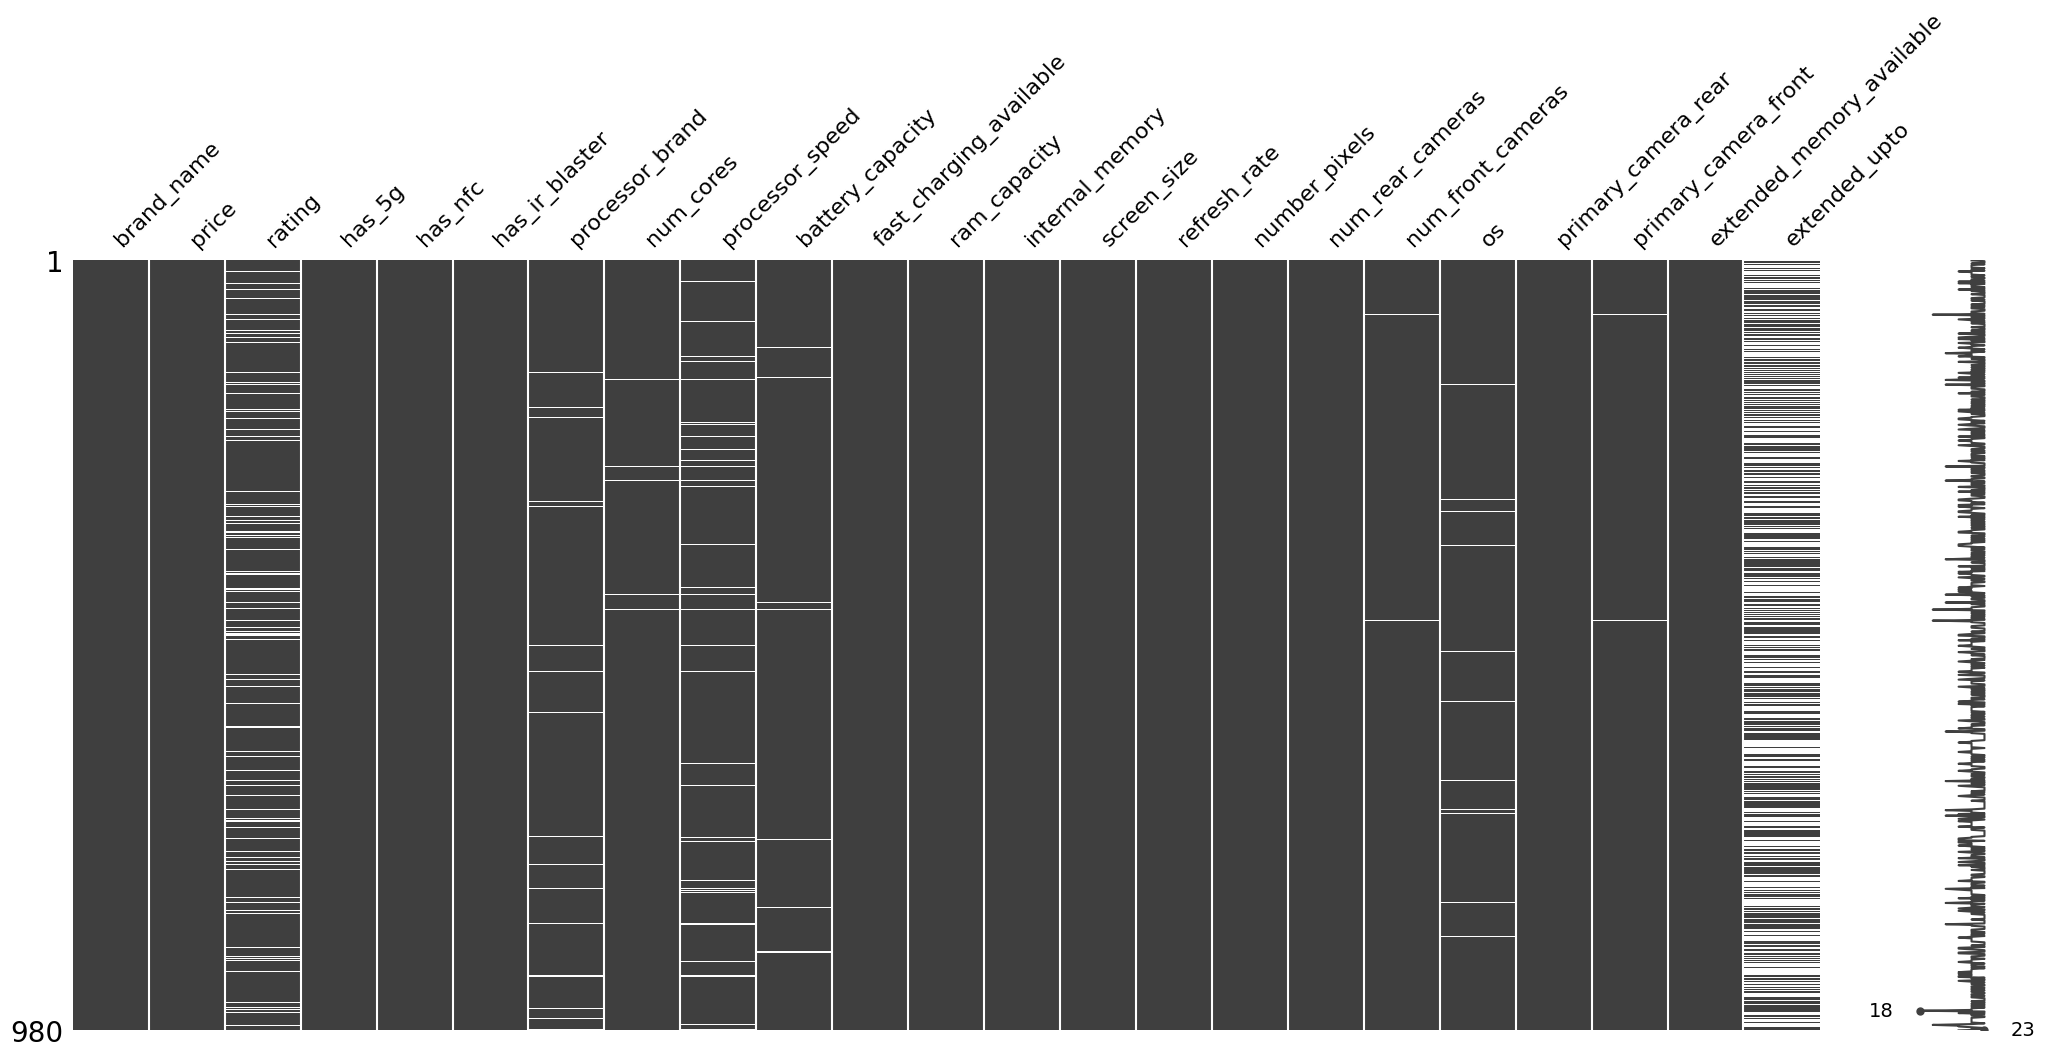

In [36]:
import missingno as msno
msno.matrix(data2)

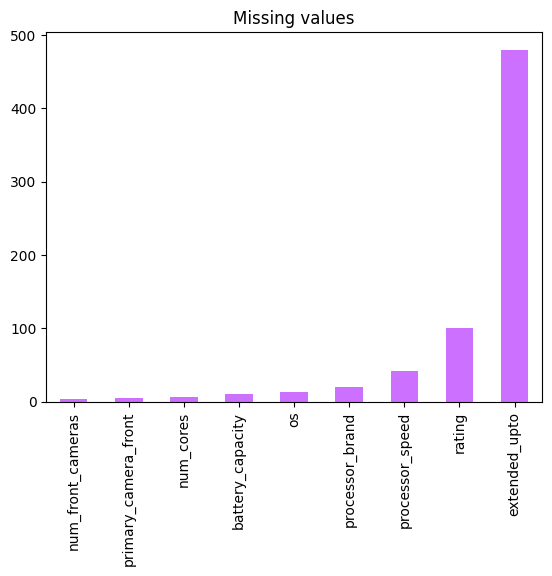

In [37]:
# plot with the missing values
missing = data2.isna().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="#cb70ff")
plt.title("Missing values")
plt.show()

In [38]:
# fem drop de extended_upto ja que te una gran quantitat de missing values
data2.drop(columns = ["extended_upto"], inplace = True)

## Convertim les variables categòriques en numèriques

In [41]:
categoricals = ['brand_name', 'processor_brand', 'os', 'has_5g',
       'has_nfc', 'has_ir_blaster']

### Categoritzant les variables

In [42]:
for var in categoricals:
    data2[var] = data2[var].astype("category").cat.codes
    data2[var] = data2[var].replace(-1, np.nan)
data3 = data2.copy()
data3.head(5)

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,internal_memory,screen_size,refresh_rate,number_pixels,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available
0,2,54999,89.0,1,1,0,3.0,8.0,3.2,5000.0,...,256.0,6.70,120,4631040,3,1.0,0.0,50.0,16.0,0
1,2,19989,81.0,1,0,0,3.0,8.0,2.2,5000.0,...,128.0,6.59,120,2604960,3,1.0,0.0,64.0,16.0,1
2,7,16499,75.0,1,0,0,2.0,8.0,2.4,5000.0,...,64.0,6.60,90,2600640,3,1.0,0.0,50.0,13.0,1
3,1,14999,81.0,1,0,0,3.0,8.0,2.2,5000.0,...,128.0,6.55,120,2592000,3,1.0,0.0,50.0,16.0,1
4,6,24999,82.0,1,0,0,0.0,8.0,2.6,5000.0,...,128.0,6.70,120,2604960,3,1.0,0.0,108.0,16.0,0


### Amb one-hot encoding

In [43]:
data3 = pd.get_dummies(data2, columns=categoricals)
data3.head(5)

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,...,processor_brand_3.0,os_0.0,os_1.0,os_2.0,has_5g_0,has_5g_1,has_nfc_0,has_nfc_1,has_ir_blaster_0,has_ir_blaster_1
0,54999,89.0,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,...,True,True,False,False,False,True,False,True,True,False
1,19989,81.0,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,...,True,True,False,False,False,True,True,False,True,False
2,16499,75.0,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,...,False,True,False,False,False,True,True,False,True,False
3,14999,81.0,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,...,True,True,False,False,False,True,True,False,True,False
4,24999,82.0,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,...,False,True,False,False,False,True,True,False,True,False


## Train-Test split

In [ ]:
y = data3["price"]
data3.drop(columns = ["price"], inplace = True)
y.isna().sum()

0

## Funció per a comprovar la linearitat i normalitat

In [ ]:
def linearity(model, X, y):
  y_pred = model.predict(X)
  plt.scatter(y, y_pred, alpha = 0.5, color="#cb70ff")
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
  plt.show()

def normality(model, X, y):
  y_pred = model.predict(X)
  sns.histplot(y-y_pred,  bins = 30, color ="#cb70ff", edgecolor="white", kde = True)
  plt.show()

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data3, y, test_size = 0.2, random_state = 41)
y_train.head(5)

785    28999
633    71999
373    42999
218     9299
486    12999
Name: price, dtype: int64

## Omplim la resta de missing data amb KNN

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = pd.DataFrame(X_train, columns = data3.columns)
X_test = pd.DataFrame(X_test, columns = data3.columns)
X_train.head(5)


,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,number_pixels,...,processor_brand_3.0,os_0.0,os_1.0,os_2.0,has_5g_0,has_5g_1,has_nfc_0,has_nfc_1,has_ir_blaster_0,has_ir_blaster_1
0,85.0,8.0,3.1,5080.0,1.0,8.0,128.0,6.67,120.0,2656800.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,86.0,8.0,3.2,6000.0,1.0,12.0,256.0,6.78,165.0,2643840.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,81.0,8.0,2.7,4100.0,1.0,8.0,128.0,6.40,60.0,4377600.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,65.0,8.0,2.3,5000.0,0.0,3.0,32.0,6.50,60.0,1152000.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,75.0,8.0,2.4,5000.0,1.0,4.0,128.0,6.58,90.0,2600640.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Escalem les nostres dades

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = data3.columns)
X_test = pd.DataFrame(X_test, columns = data3.columns)
X_test.head(5)

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,number_pixels,...,processor_brand_3.0,os_0.0,os_1.0,os_2.0,has_5g_0,has_5g_1,has_nfc_0,has_nfc_1,has_ir_blaster_0,has_ir_blaster_1
0,0.931034,1.0,0.811881,0.065664,0.0,0.411765,0.118110,0.750751,0.000000,0.398927,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.724138,1.0,0.420792,0.147870,1.0,0.411765,0.118110,0.519520,0.166667,0.369654,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.862069,1.0,0.915842,0.155890,1.0,0.411765,0.244094,0.630631,0.333333,0.369654,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.896552,1.0,0.811881,0.097744,1.0,0.411765,0.118110,0.420420,0.333333,0.391608,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.758621,1.0,0.544554,0.148872,1.0,0.294118,0.118110,0.591592,0.333333,0.369654,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

Mean squared error (train): 918014508.67
Mean squared error (test): 291396500.06
R2 (train): 0.46
R2 (test): 0.70


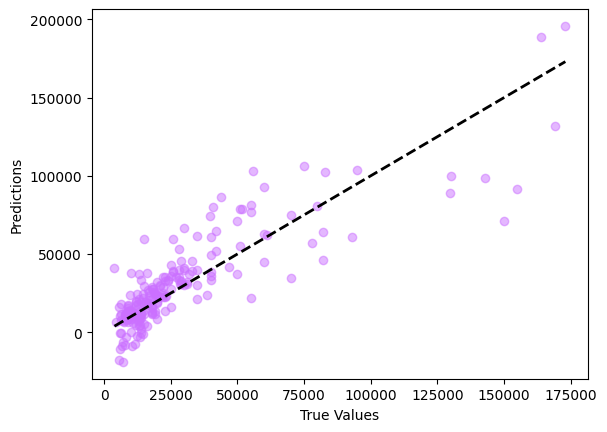

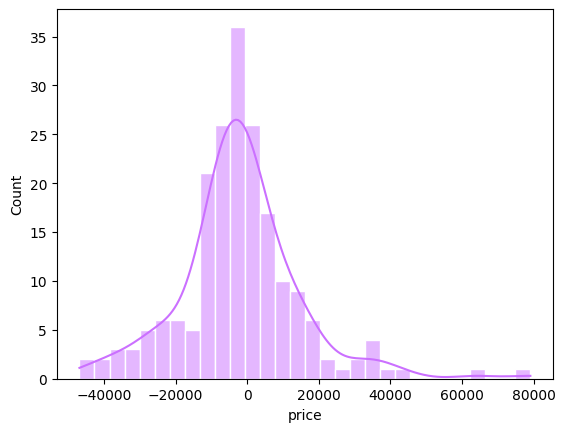

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean squared error (train): {mse_train:.2f}")
print(f"Mean squared error (test): {mse:.2f}")
print(f"R2 (train): {r2_train:.2f}")
print(f"R2 (test): {r2:.2f}")
linearity(model, X_test, y_test)
normality(model, X_test, y_test)